In [27]:
import pandas as pd
#from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sns

# Sample election-related posts
election_posts = [
    "Candidate A's policies are fantastic! #Election2025",
    "I'm worried about the future if Candidate B wins. #Election2025",
    "Candidate A's speech was inspiring. #Election2025",
    "I don't trust Candidate B at all. #Election2025",
    "We need a change, and Candidate A is the best choice. #Election2025",
    "Candidate B's plans for healthcare are promising. #Election2025",
    "Candidate A has a strong stance on education reform. #Election2025",
    "The debate between Candidate A and Candidate B was intense. #Election2025",
    "I'm excited to vote for Candidate A. #Election2025",
    "Candidate B's economic policies are concerning. #Election2025",
    "Candidate A's environmental policies are much needed. #Election2025",
    "I believe Candidate B will bring positive change. #Election2025",
    "Candidate A's experience makes them the best choice. #Election2025",
    "Candidate B's foreign policy is well thought out. #Election2025",
    "I'm undecided between Candidate A and Candidate B. #Election2025"
]
df = pd.DataFrame(election_posts, columns=["Content"])
df['likes']=[3,1,1,0,2,1,2,2,2,5,0,0,1,27,0]

In [ ]:
# Determine the optimal number of clusters using the elbow method
import matplotlib.pyplot as plt

def plot_elbow_method(X):
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

#plot_elbow_method(X)

NameError: name 'df_a' is not defined

In [29]:
# Vectorize the posts using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
matrix = vectorizer.fit_transform(df['Content']).toarray()
feature_names = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(matrix, columns=feature_names)
#print(df_tfidf)

X = vectorizer.fit_transform(df["Content"])

In [30]:
# Cluster the posts using K-Means
num_clusters = 4  # Set the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the DataFrame
df["Cluster"] = kmeans.labels_

# Display the clustered DataFrame
print(df)

                                              Content  likes  Cluster
0   Candidate A's policies are fantastic! #Electio...      3        2
1   I'm worried about the future if Candidate B wi...      1        1
2   Candidate A's speech was inspiring. #Election2025      1        1
3     I don't trust Candidate B at all. #Election2025      0        1
4   We need a change, and Candidate A is the best ...      2        3
5   Candidate B's plans for healthcare are promisi...      1        0
6   Candidate A has a strong stance on education r...      2        1
7   The debate between Candidate A and Candidate B...      2        1
8   I'm excited to vote for Candidate A. #Election...      2        1
9   Candidate B's economic policies are concerning...      5        2
10  Candidate A's environmental policies are much ...      0        2
11  I believe Candidate B will bring positive chan...      0        1
12  Candidate A's experience makes them the best c...      1        3
13  Candidate B's fo

In [31]:
# Import Latent Dirichlet Allocation
from sklearn.decomposition import LatentDirichletAllocation

# Apply LDA to the TF-IDF matrix
lda = LatentDirichletAllocation(n_components=4, random_state=42)
lda.fit(matrix)

# Display the topics
def display_topics(model, feature_names, no_top_words):
	for topic_idx, topic in enumerate(model.components_):
		print("Topic %d:" % (topic_idx))
		print(" ".join([feature_names[i]
						for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, feature_names, no_top_words)

# Get the topic distribution for each document
topic_distribution = lda.transform(matrix)
df["Topic"] = topic_distribution.argmax(axis=1)

Topic 0:
candidate policies election2025 fantastic trust don intense debate needed environmental
Topic 1:
speech inspiring concerning economic election2025 candidate thought foreign policy policies
Topic 2:
candidate undecided election2025 plans promising healthcare experience makes stance education
Topic 3:
vote excited election2025 candidate future worried wins need change choice


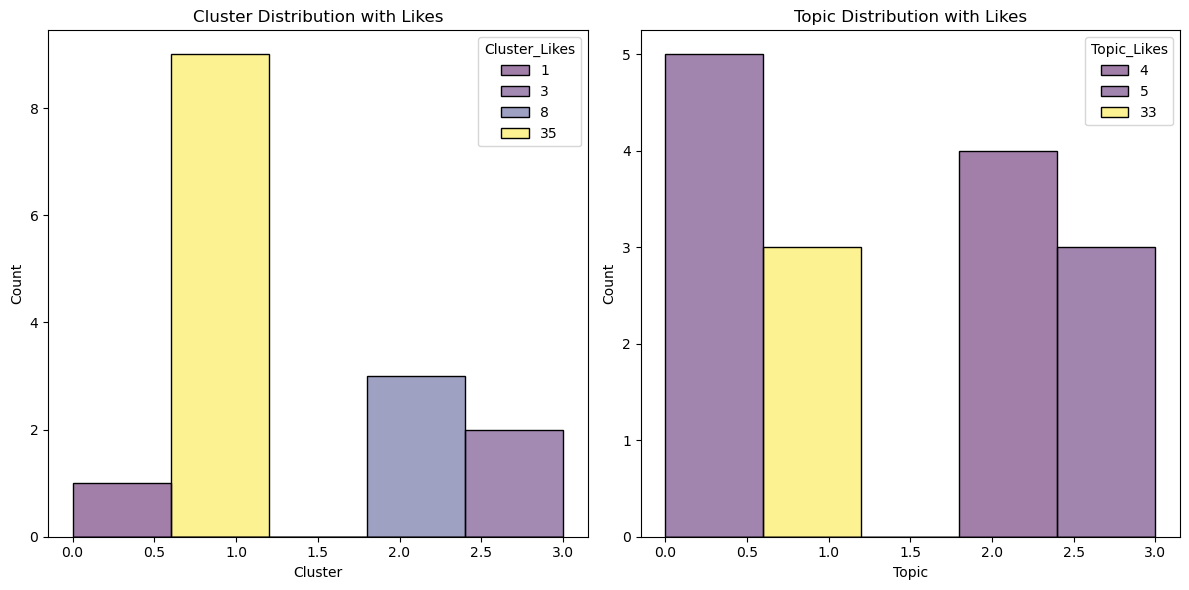

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

#get sum likes
df['Cluster_Likes'] = df.groupby('Cluster')['likes'].transform('sum')
df['Topic_Likes'] = df.groupby('Topic')['likes'].transform('sum')

sns.histplot(df, x='Cluster', hue='Cluster_Likes', palette='viridis', ax=ax[0])
ax[0].set_title('Cluster Distribution with Likes')

df['Topic_Likes'] = df.groupby('Topic')['likes'].transform('sum')

sns.histplot(df, x='Topic', hue='Topic_Likes', palette='viridis', ax=ax[1])
ax[1].set_title('Topic Distribution with Likes')

plt.tight_layout()
plt.show()

In [38]:
df[df['Cluster']==1]['likes'].sum()

np.int64(35)

words for cluster 1

In [24]:
cl1 = df[df['Cluster'] == 1]

# Get the indices of the posts in cluster 1
cl1_indices = cl1.index

# Get the TF-IDF values for the posts in cluster 1
cl1_tfidf = matrix[cl1_indices]

# Calculate the mean TF-IDF score for each word in cluster 1
cl1_mean_tfidf = cl1_tfidf.mean(axis=0)

# Get the words with the highest mean TF-IDF scores
top_words_indices = cl1_mean_tfidf.argsort()[::-1][:10]
top_words = [feature_names[i] for i in top_words_indices]

print("Top words for cluster 1:", top_words)

Top words for cluster 1: ['candidate', 'election2025', 'undecided', 'inspiring', 'speech', 'trust', 'vote', 'excited', 'don', 'intense']
